# Multiple Linear Regression

## Import the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2.Load the Dataset 

In [4]:
data = pd.read_csv(r'Housing-2-1 (1).csv')

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 3.Data- Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Duplicate
data.duplicated().sum()

np.int64(0)

In [9]:
# Handling missing values
# Handling Duplicate values

In [10]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [11]:
# Dummy Variable / One hot encoding

In [12]:
data=pd.get_dummies(data,drop_first=True)

In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


# Assumption of Linear Regression

# 1.Linearity Test

Columns: price


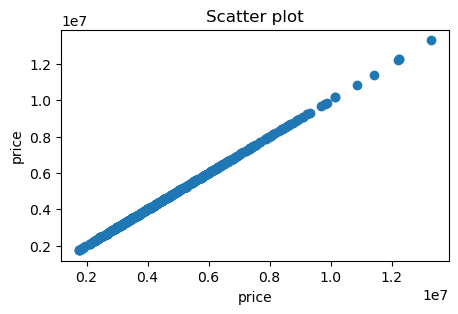

Columns: area


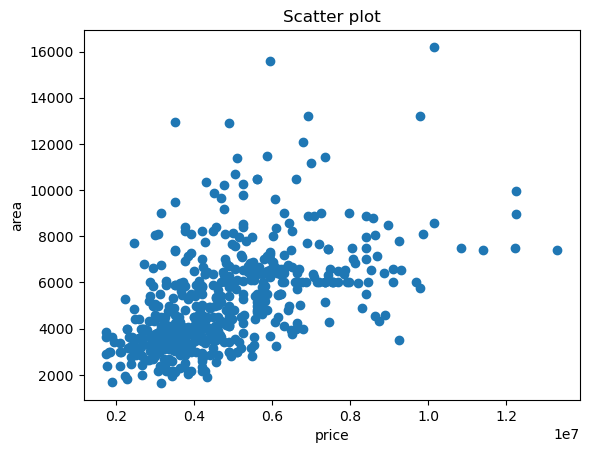

Columns: bedrooms


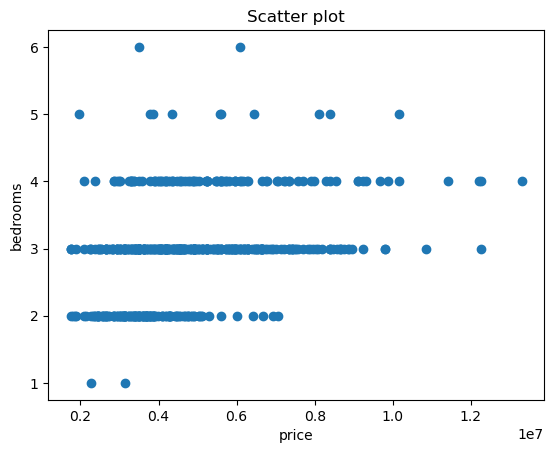

Columns: bathrooms


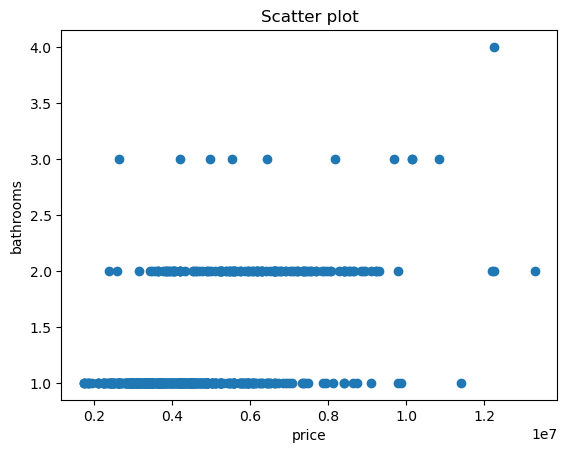

Columns: stories


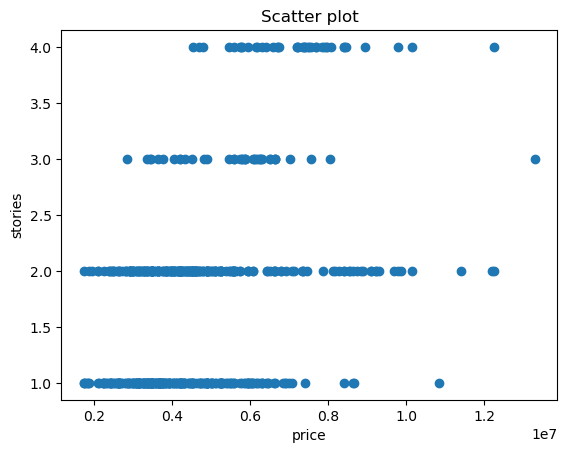

Columns: parking


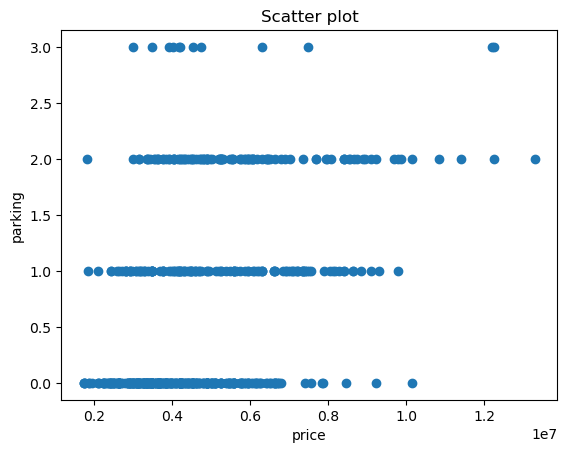

Columns: mainroad_yes


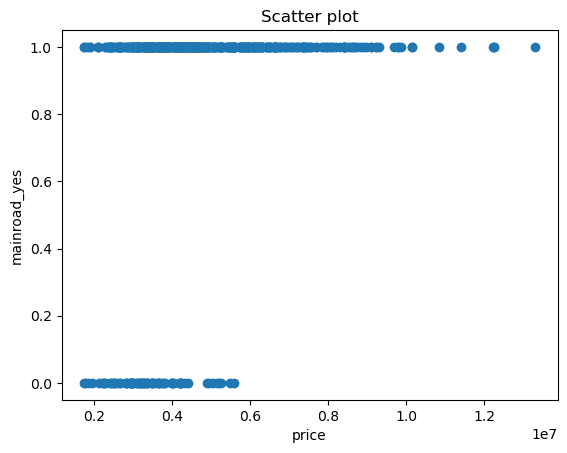

Columns: guestroom_yes


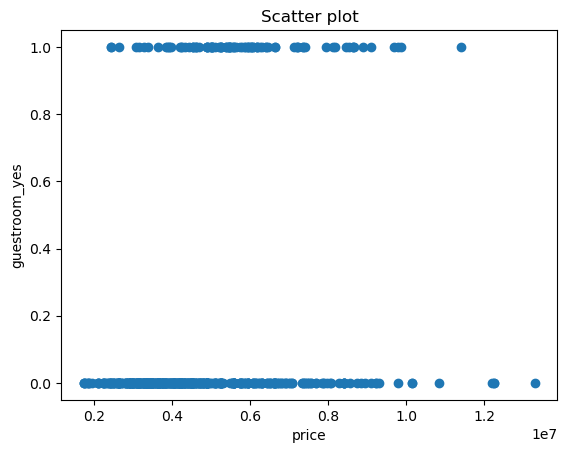

Columns: basement_yes


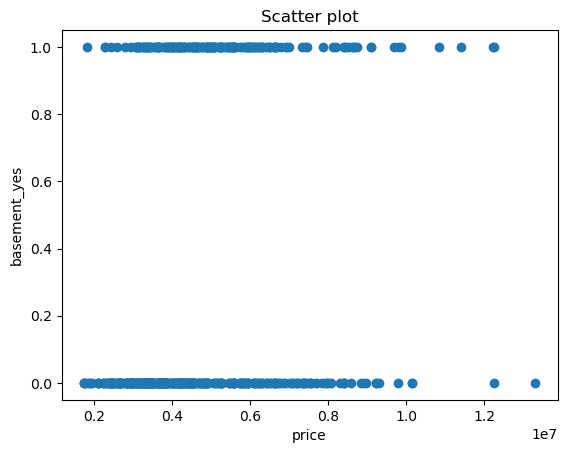

Columns: hotwaterheating_yes


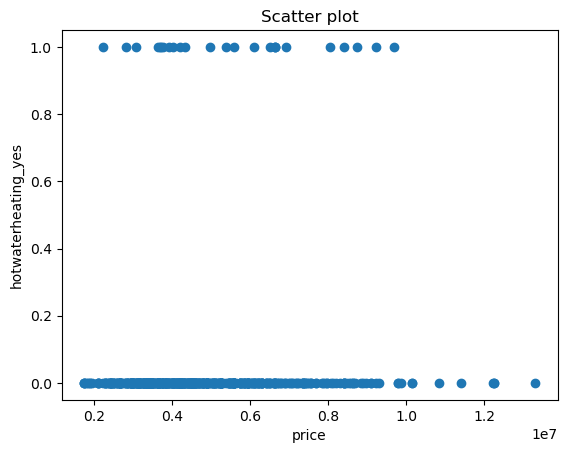

Columns: airconditioning_yes


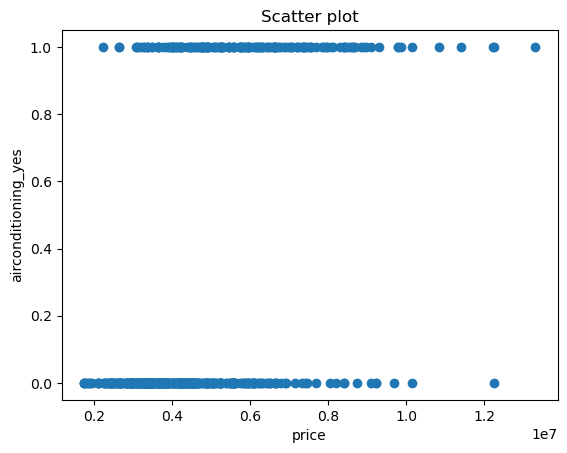

Columns: prefarea_yes


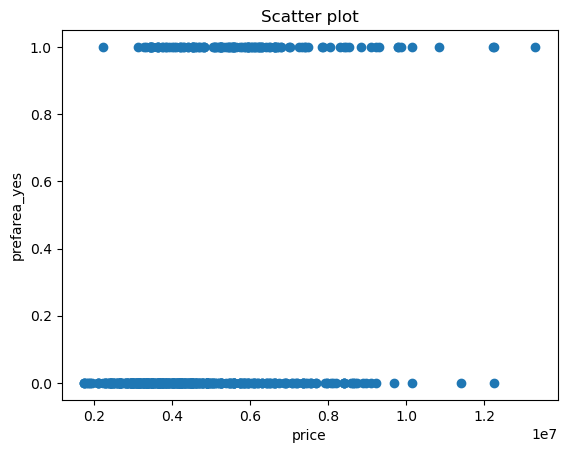

Columns: furnishingstatus_semi-furnished


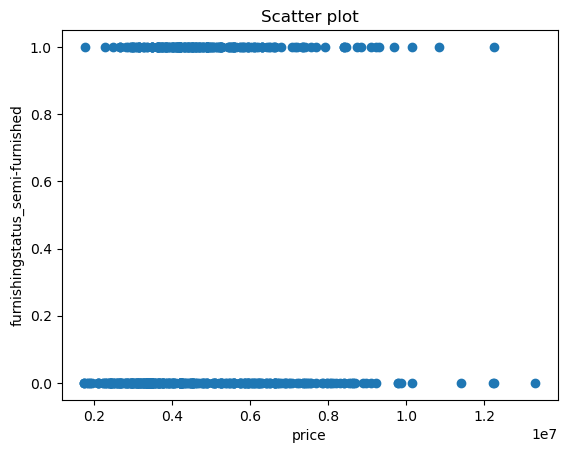

Columns: furnishingstatus_unfurnished


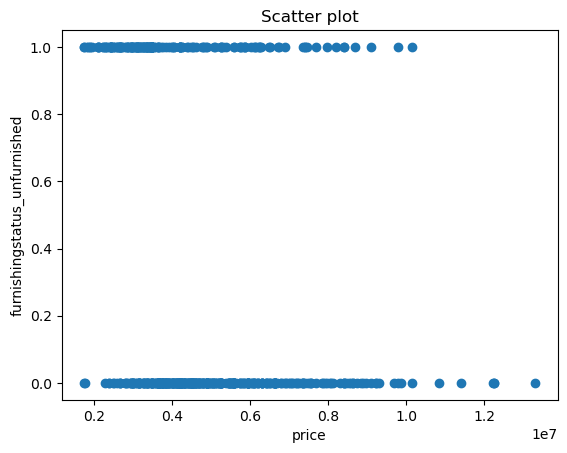

In [14]:
plt.figure(figsize=(5,3))
for col in data.columns:
    print("Columns:", col)
    plt.scatter(x=data['price'],y=data[col])
    plt.xlabel('price')
    plt.ylabel(col)
    plt.title('Scatter plot')
    plt.show()

## 3. No Multi-collinearity between independent variables

In [15]:
# heat map

In [16]:
import seaborn as sns

In [17]:
data_corr=data.corr()

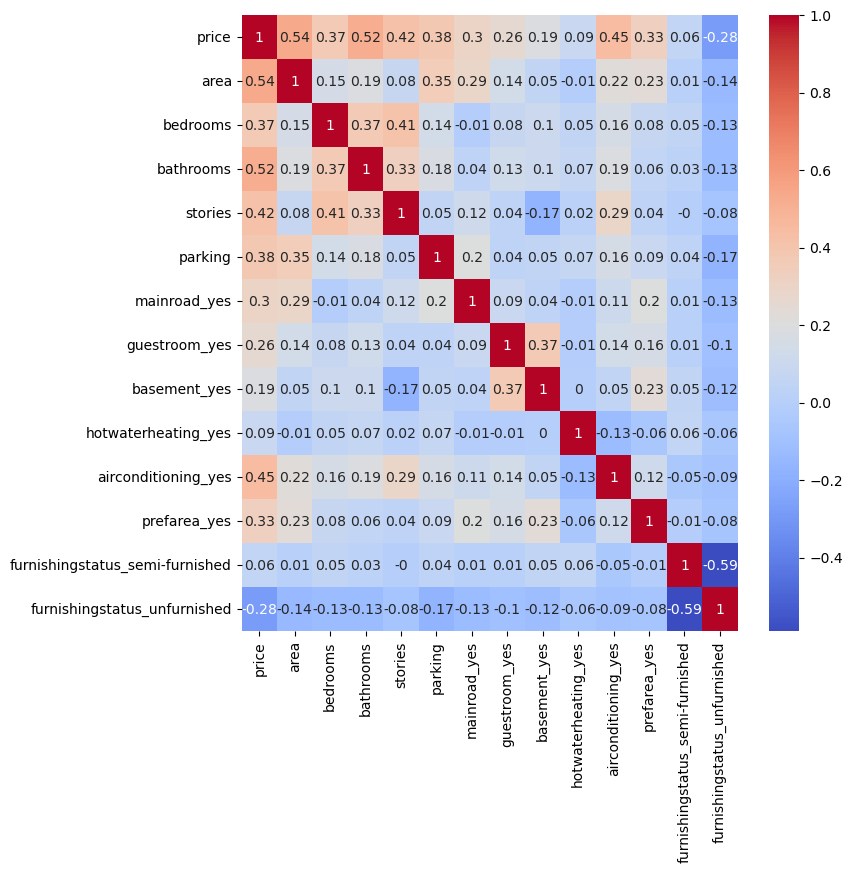

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(round(data_corr,2),annot=True,cmap='coolwarm')

plt.show()

In [19]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False


In [20]:
## Define Target(dependent variable) and Independent variables/features

In [21]:
X = data.drop(columns=['price'],axis=1) #independent variable
y = data['price'] # Dependent Variable

# Split the data into Training and test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape,y_train.shape

((436, 13), (436,))

In [25]:
X_test.shape,y_test.shape

((109, 13), (109,))

# Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler= StandardScaler()

In [28]:
X_train_scaled=scaler.fit_transform(X_train)

In [29]:
X_test_scaled=scaler.transform(X_test)

# Model Building

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
# train
model.fit(X_train_scaled,y_train)

LinearRegression()

In [33]:
#prediction
y_pred=model.predict(X_test_scaled)

# Model Evaluation

In [34]:
print("Accuracy:")
print(model.score(X_test_scaled,y_test))

Accuracy:
0.6529242642153175


In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [36]:
# Mean Square Error

In [37]:
mse= mean_squared_error(y_test,y_pred)
print(f"Mean Square Error is {mse:.2f}")

Mean Square Error is 1754318687330.67


In [38]:
# Root Mean Square Error

In [39]:
rmse=np.sqrt(mse)
print(f"Root Mean Square Error is {rmse:.2f}")

Root Mean Square Error is 1324506.96


In [40]:
# Mean absolute error
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean absolute error is {mae:.2f}")

Mean absolute error is 970043.40


In [41]:
#R2 score

In [42]:
r2= r2_score(y_test,y_pred)
print(f"R-Square:{r2:.2f}")

R-Square:0.65


# model Interpretation

In [43]:
coeff= model.coef_
intercept=model.intercept_

In [44]:
print("Coefficients (Slope) :")
for feature,coef in zip(X.columns,coeff):
    print(f"{feature}:{coef:.2f}")

Coefficients (Slope) :
area:519552.42
bedrooms:57349.56
bathrooms:521879.03
stories:349251.44
parking:192005.95
mainroad_yes:128498.63
guestroom_yes:88768.67
basement_yes:187067.80
hotwaterheating_yes:149862.70
airconditioning_yes:365157.39
prefarea_yes:266656.35
furnishingstatus_semi-furnished:-62837.32
furnishingstatus_unfurnished:-192015.92


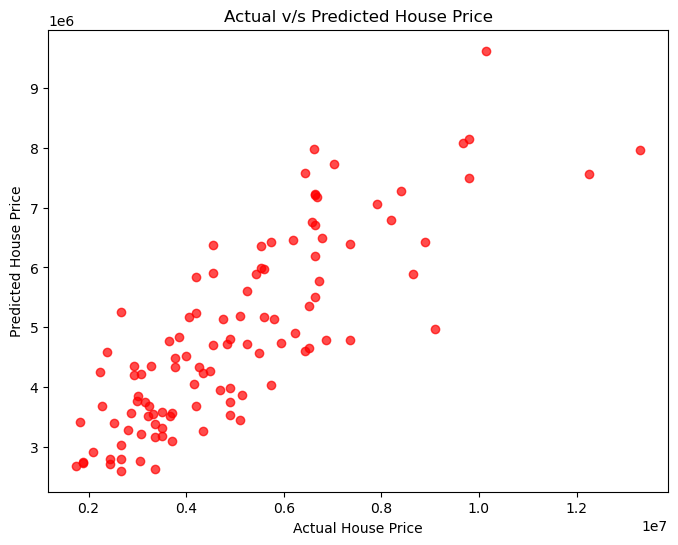

In [45]:
# Plot the actual vs prediction
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='red',alpha=0.7)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual v/s Predicted House Price')

plt.show()